# Q-Learning
## Critic
在之前提到的PG算法和PPO算法都是对policy进行优化，policy是直接控制对环境进行交互行为的。Q-Learning是作为Critic进行训练的，Critic并不会直接决定行为，而是对于给定的策略$\pi$，会评估这个策略的好坏。  
其训练的函数为$V^{\pi}(s)$，该函数代表的函数是对于给定的策略$\pi$，在观察到状态s后，能够获得的累积期望reward。  
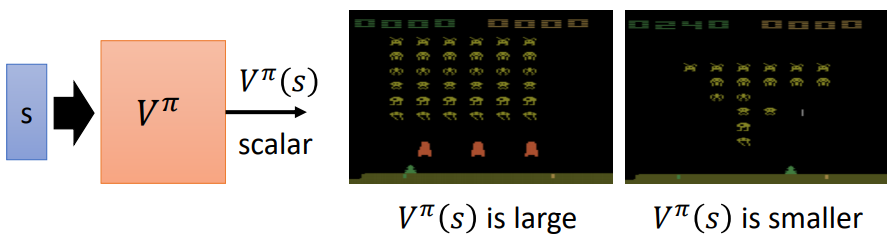  
## how to estimate $V^{\pi}(s)$  
* Monte-Carlo(MC) based approach  
对于给定的状态$s_a$，根据当前的策略$\pi$来进行动作的选择，当一个episode结束时，计算此时累积的收获为$G_a$，则$V^{\pi}(s_a)$要趋近于$G_a$。  
* Temporal-difference(TD) approach  
在某些应用中的episode非常长，此时使用MC算法耗时比较久。我们针对状态$s_t$，采用策略$\pi$获得序列{...$s_t,a_t,r_t,s_{t+1}$...}，根据$V^{\pi}(s)$的定义我们可以得到  
$$V^{\pi}(s_t) = V^{\pi}(s_{t+1}) + r_t$$  
因此此时的训练是让$V^{\pi}(s_t) - V^{\pi}(s_{t+1})$的值趋近于$r_t$。  
## MC v.s. TD  
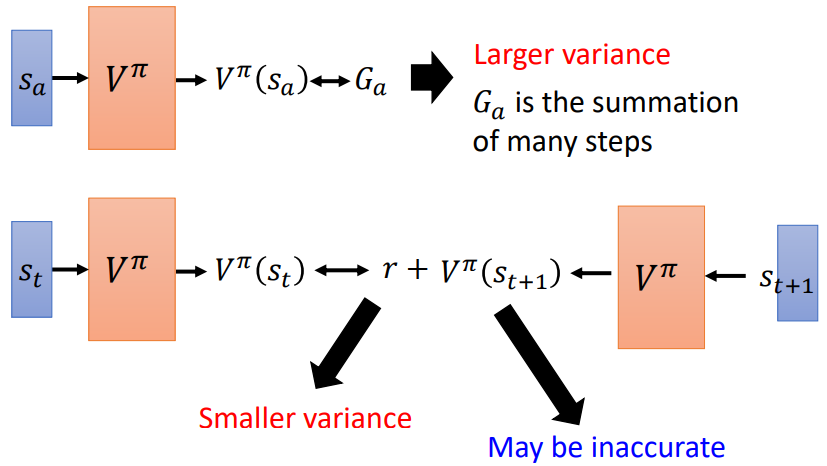  
## Another Critic  
State-Action函数为$Q^{\pi}(s,a)$，其含义为对于给定的策略$\pi$，在观察到状态s并且采取动作a后，能够获得的累积期望reward。  
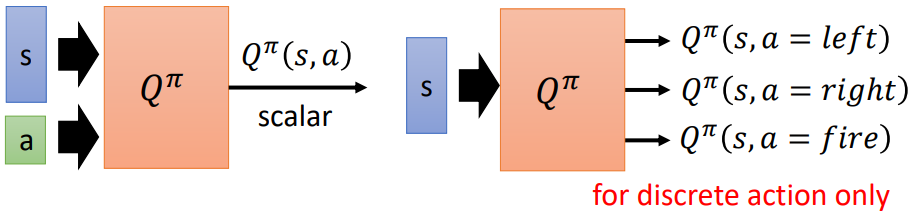  
## Q-Learning
Q-Learning是一种利用Critic来训练策略$\pi$的训练方法，其具体的流程为  
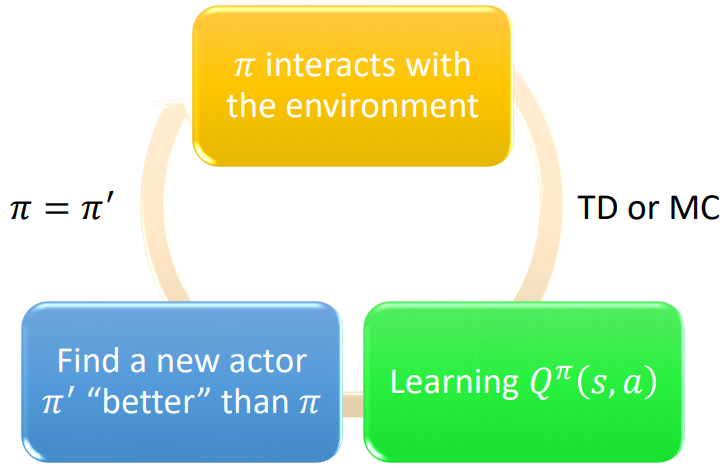  
该流程的问题是我们如何选取$\pi_{'}$并判断其优于$\pi$。在该算法流程中，"Better"的定义为对于任意的状态s，都有$V^{\pi^{'}}(s) \ge V^{\pi}(s)$.  
训练过程中$\pi^{'}$的选取为  
$$\pi_{'}(s) = \arg\max_{a}Q^{\pi}(s,a)$$  
在这个流程中，$\pi^{'}$的选取完全依赖于Q，并且这个方法只适用于此时a可以穷举的情况下，当a为连续值时并不适用，我们稍后会讨论如何解决这个问题。  
我们定义$\pi^{'}(s) = \arg\max_{a}Q^{\pi}(s,a)$，此时如何证明对于任意的状态s都有$V^{\pi^{'}}(s) \ge V^{\pi}(s)$?  
我们有$V^{\pi}(s) = Q^{\pi}(s,\pi(s)) \le max_{a}Q^{\pi}(s,a)=Q^{\pi}(s,\pi^{'}(s))$  
$$\begin{equation}
\begin{aligned}
V^{\pi}(s) &\le Q^{\pi}(s,\pi^{'}(s))\\
&=E[r_{t+1}+V^{\pi}(s_{t+1})|s_t=s,a_t=\pi^{'}(s_t)]\\
&\le E[r_{t+1}+Q^{\pi}(s_{t+1},\pi^{'}(s_{t+1}))|s_t=s,a_t=\pi^{'}(s_t)]\\
&=E[r_{t+1}+r_{t+2}+V^{\pi}(s_{t+2})|...]\\
&\le E[r_{t+1}+r_{t+2}+Q^{\pi}(s_{t+2},\pi^{'}(s_{t+2}))|...]...\\
&\le V^{\pi^{'}}(s)
\end{aligned}
\end{equation}$$  
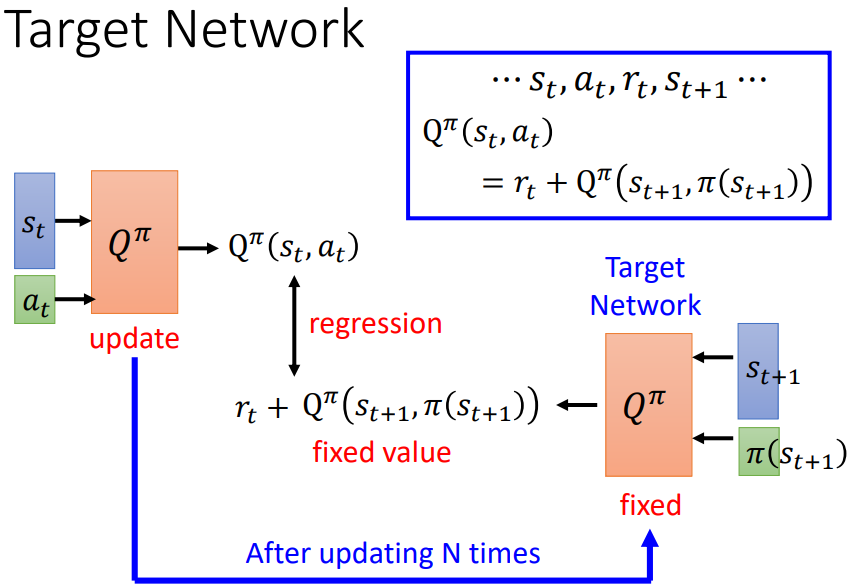  
如上图所示，在训练目标网络$Q^{\pi}$时，通常需要涉及两个网络，如果在更新网络的过程中总是同时更新两个网络，则我们很难训练出一个合适的网络，因此在实际训练过程中，我们通常会先固定一个网络的参数，然后在另一个网络更新几个回合后再去更新其参数。  
* Exploration  
在训练过程中，如果我们从抽取的所有样本中选择出s状态下能够获得最大reward的a后，就不在去探索其他的可能性，那么可能存在一些能够获得更高reward的动作a没有被抽样到，导致永远不会采取这个action，这样是不合理的，因此我们需要增加exploration的操作，其具体实现如下图所示。  
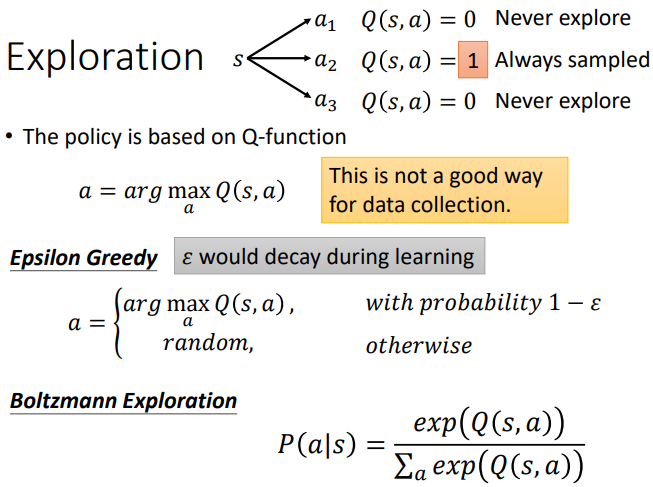  
* Replay Buffer  
在进行Q-Learning的过程中，我们将策略$\pi$收集的用于训练exp({$s_t,a_t,r_t,s_{t+1}$})存放在buffer中，每次训练Q的时候会随机从buffer中抽取小批量的样本进行训练，只有当buffer满了才会清空buffer，因此在训练Q时用到的exp可能来自不同的策略。  
Q-Learning训练算法如下所示：  
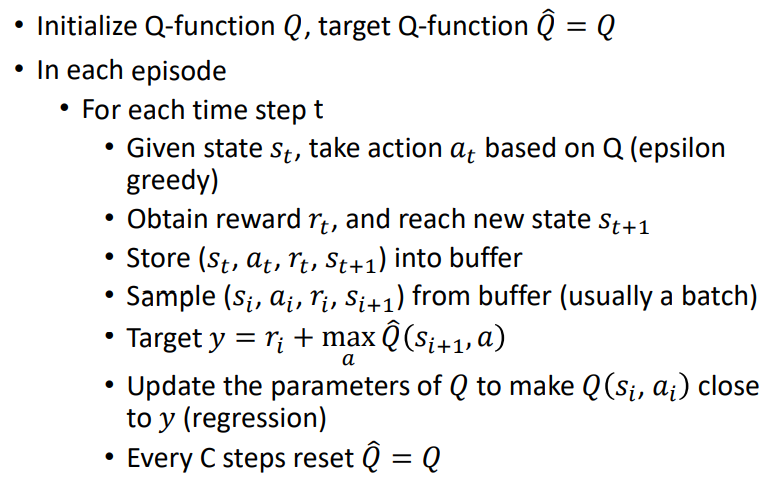